In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [3]:
data = pd.read_csv('Catalogues/NGC1027_8_Pop2.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,e_Plx,PM,pmRA,pmDE,Solved,nueff,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,41.623957,59.703399,464340188661593472,0.8678,0.3916,2.502,-0.567,2.437,95,NaN,...,1.001,19.757400,21.037899,18.698357,2.339542,NaN,41.214907,41.623962,59.703388,0.893857
1,41.526110,59.663305,464340390525839616,0.8485,0.2780,3.447,-3.042,1.622,95,NaN,...,0.991,19.291763,20.494804,18.243275,2.251530,NaN,41.197618,41.526137,59.663297,0.867277
2,41.493276,59.797474,464344552348174336,0.8856,0.3377,3.142,-2.768,1.487,95,NaN,...,1.071,19.456285,20.727522,18.367048,2.360474,NaN,41.327361,41.493301,59.797467,0.910681
3,40.980968,59.688050,464349289698115072,0.8867,0.2345,2.782,-1.835,2.091,95,NaN,...,0.987,19.125140,20.321392,18.140501,2.180891,NaN,41.329821,40.980984,59.688040,0.911681
4,41.024832,59.701610,464349637592001664,0.9095,0.8894,2.544,-1.885,1.709,95,NaN,...,1.179,20.555613,21.214590,19.459024,1.755566,NaN,41.333401,41.024849,59.701602,0.955963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,40.110682,63.534996,515662844529779712,0.9504,0.5817,2.250,-1.597,1.585,95,NaN,...,1.036,20.335096,20.963730,19.283390,1.680340,NaN,45.001656,40.110698,63.534989,0.990722
2567,39.879872,63.562059,515663737882709504,0.9108,0.1520,3.135,-1.317,2.845,31,1.349,...,1.047,18.463370,19.455551,17.507929,1.947622,NaN,45.070410,39.879885,63.562046,0.932990
2568,39.926834,63.580962,515664081480440448,0.9778,0.4284,1.968,-0.710,1.835,95,NaN,...,1.003,20.067148,20.842766,19.177397,1.665369,NaN,45.078426,39.926841,63.580954,1.009689
2569,40.138478,63.544578,515664360654018432,1.0549,0.3833,3.333,-3.219,0.864,95,NaN,...,1.008,19.755924,20.753645,18.861647,1.891998,NaN,45.004979,40.138510,63.544575,1.080472


/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


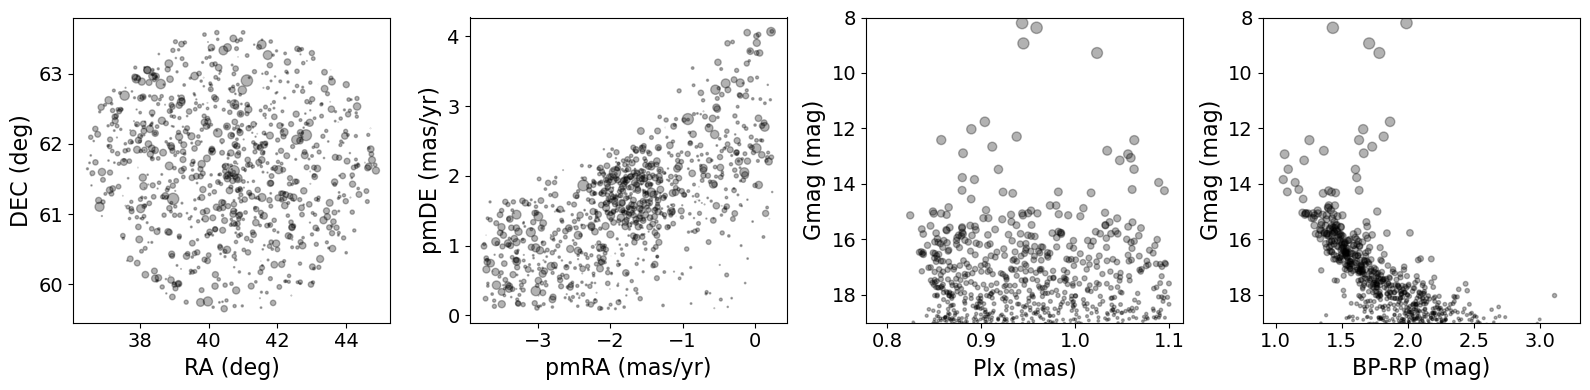

In [4]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,8)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,8)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)


In [5]:
population = data

## First Analysis

### RA,DEC

In [6]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data,"RAJ2000","DEJ2000",20,0)

In [7]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 40.4032
DEC = 61.9302


Text(0, 0.5, 'DEC (deg)')

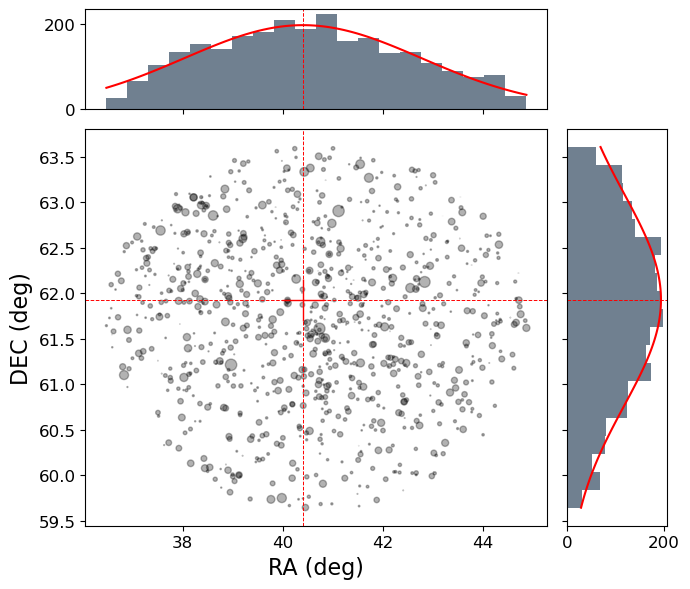

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [9]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data,"pmRA","pmDE",20,0)

In [10]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -1.5664
pmDE = 1.4799


Text(0, 0.5, 'pmde (mas/yr)')

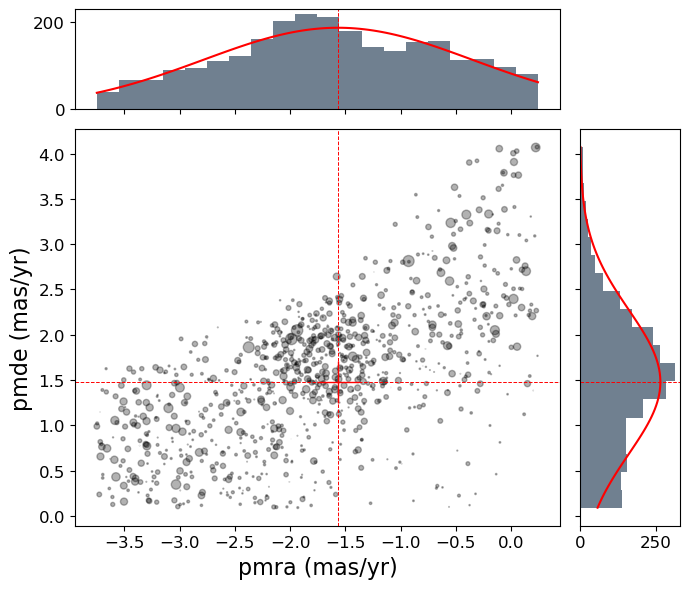

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [12]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data,"Plx_corr",20,30000)

In [13]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 190458.1836


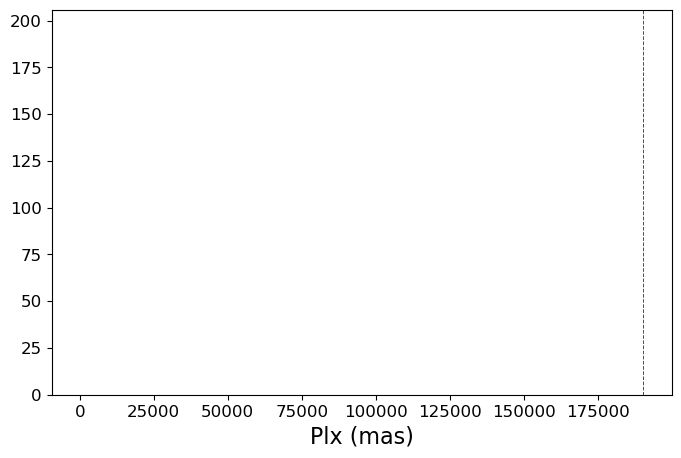

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)